In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
G = nx.Graph()

In [3]:

G = nx.Graph(day="Friday")
G.graph
{'day': 'Friday'}


{'day': 'Friday'}

In [4]:


G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
{'time': '5pm'}
G.nodes[1]['room'] = 714
G.nodes.data()



     


NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [5]:


G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2



     


In [6]:


DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')
DG.degree(1, weight='weight')
list(DG.successors(1))
list(DG.neighbors(1))



     


[2]

In [7]:
positions=nx.spring_layout(G)

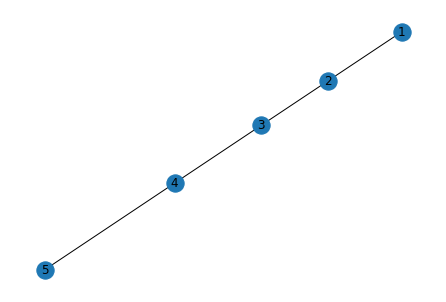

In [8]:
nx.draw(G,pos=positions)
nx.draw_networkx_labels(G,pos=positions)
plt.draw() 


In [9]:


coauthorshipG=nx.read_graphml("netScience.graphml")



     


In [10]:


positions=nx.spring_layout(coauthorshipG)


nx.draw(coauthorshipG,pos=positions)
nx.draw_networkx_labels(coauthorshipG,pos=positions)
plt.draw() 

     


AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

In [11]:

from urllib.request import urlopen
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = (stopwords.words('english'))

punctuations = '''!()-,[]{};:'”“"’`\,,<>./?@$%^&*_~'''

extra_words = ['I', 'The', 'one', 'He', 'It', 'said', '...', 'would']

target_url1 = 'http://www.gutenberg.org/files/135/135-0.txt'
book_raw = urlopen(target_url1).read().decode('utf-8')

word_tokens1 = word_tokenize(book_raw)

swr_word_tokens1 = [word for word in word_tokens1 if not word in stop_words]
eswr_word_tokens1 = [word for word in swr_word_tokens1 if not word in extra_words]
pswr_word_tokens1 = [word for word in eswr_word_tokens1 if not word in punctuations]


In [12]:
character_list = ['Myriel','Bishop','Baptistine','Magloire','Cravatte','Valjean','Gervais','Fantine','Tholomyès'
                  ,'Blachevelle','Dahlia','Fameuil','Favourite','Listolier','Zéphine','Cosette','Thénardier',
                  'Éponine','Azelma','Javert','Fauchelevent','Bamatabois','Champmathieu',
                  'Brevet','Simplice','Chenildieu','Cochepaille','Innocente','Reverend','Ascension','Crucifixion',
                  'Gavroche','Magnon',
                  'Gillenormand','Marius','Colonel','Mabeuf','Enjolras','Combeferre','Prouvaire',
                 'Feuilly','Courfeyrac','Bahorel','Lesgle','Joly','Grantaire','Patron-Minette','Brujon',
                 'Toussaint'] 
numCharacters  = len(character_list)


In [13]:
character_map = {}
for i in range(numCharacters):
    character_map[i] = character_list[i]


In [14]:


k = 0;
numOccurrences = pd.Series(range(numCharacters))
for character in character_list:
    numOccurrences[k] = pswr_word_tokens1.count(character)
    k = k+1



     


In [15]:


positions_characters = [] 
for i in range(len(numOccurrences)):
    a = np.zeros(numOccurrences[i])  
    positions_characters.append(a)  



     


In [16]:


numTokens = len(pswr_word_tokens1)



     


In [17]:


for j in range(numCharacters):
    positions_current   = []
    for i in range(numTokens):
        if pswr_word_tokens1[i] == character_list[j]:
            #print(i)
            positions_current.append(i)
    positions_characters[j][:] = positions_current 



     


In [18]:

interactions_characters = np.zeros((numCharacters,numCharacters))
for i in range(numCharacters - 1):
    for j in range(i + 1,numCharacters):
        for loc_i in range(numOccurrences[i]):
            for loc_j in range(numOccurrences[j]):
                dist = abs(positions_characters[i][loc_i]-positions_characters[j][loc_j])
                if (dist < 500):
                    interactions_characters[i,j] = interactions_characters[i,j]+1
                    interactions_characters[j,i] = interactions_characters[j,i]+1



     

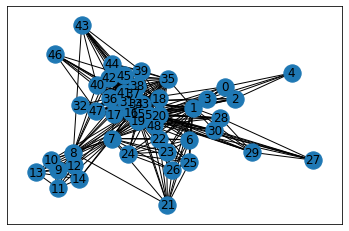

In [19]:

G1 = nx.from_numpy_matrix(interactions_characters) 
nx.draw_networkx(G1)


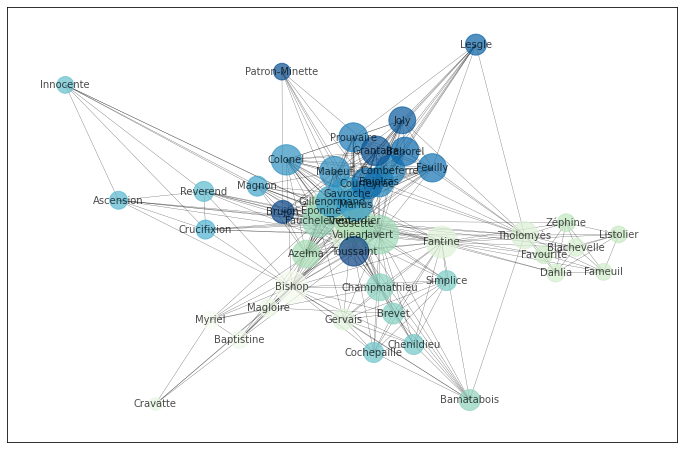

In [20]:
kdeg = G1.degree()
fig = plt.figure(figsize = (12, 8))
ax1 = plt.subplot(111)
H1 = nx.relabel_nodes(G1, character_map)

nx.draw_networkx(H1, node_color = range(numCharacters), font_color = 'black', width = 0.3, alpha = 0.7, 
                 font_size = 10, cmap = plt.cm.GnBu, node_size =[40*val for (node, val) in kdeg])




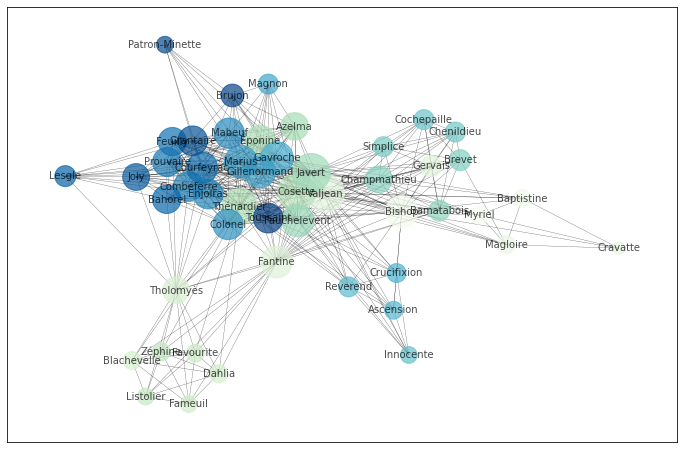

In [21]:

fig = plt.figure(figsize = (12, 8))
ax1 = plt.subplot(111)
H2 = nx.relabel_nodes(nx.from_numpy_matrix(np.log(1 + interactions_characters)), character_map)

nx.draw_networkx(H2, node_color = range(numCharacters), font_color = 'black', width = 0.3, alpha = 0.7, 
                 font_size = 10, cmap = plt.cm.GnBu, node_size =[40*val for (node, val) in kdeg])




In [22]:


degree_centrality = nx.degree_centrality(H1)
nx.set_node_attributes(H1, degree_centrality, 'dc')



     


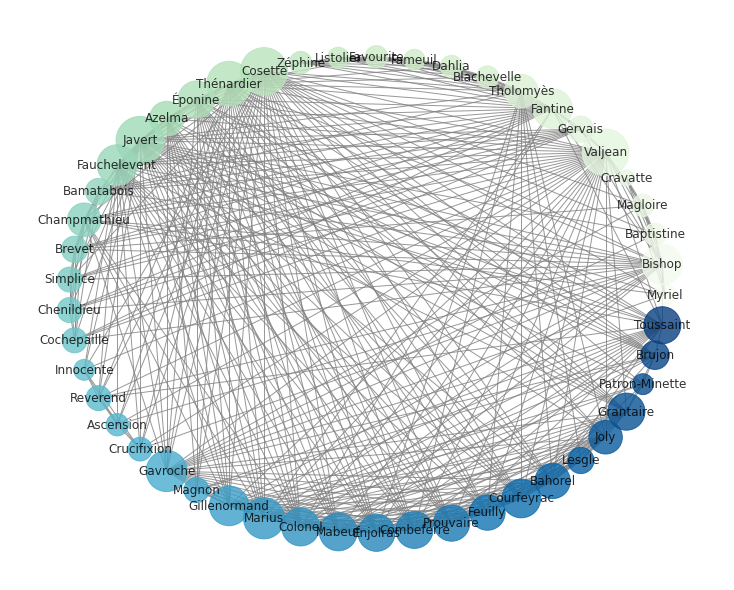

In [23]:


fig = plt.figure(figsize = (10, 8))
nx.draw_circular(H1, node_color = range(numCharacters), font_color = 'black', alpha = 0.8, edge_color = 'gray',
                 font_size = 12, with_labels = True, cmap = plt.cm.GnBu,
                 node_size = [3000*v for v in degree_centrality.values()])



     


In [24]:


centralityValues = [v for v in degree_centrality.values()]



     


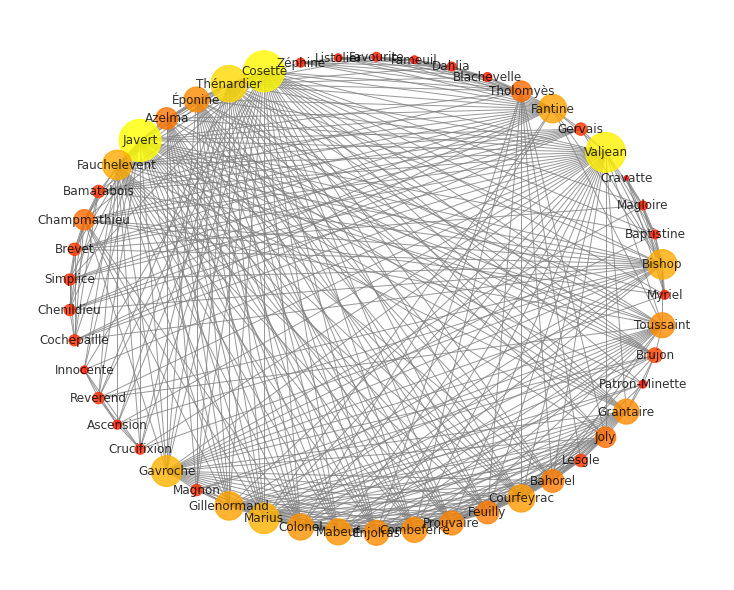

In [25]:

fig = plt.figure(figsize = (10, 8))
nx.draw_circular(H2, node_color = centralityValues, font_color = 'black', alpha = 0.8, edge_color = 'gray', 
                 #edge_weight = 5,
                 font_size = 12, with_labels = True, cmap = plt.cm.autumn,
                 node_size = [3000*(v**2) for v in degree_centrality.values()])


In [26]:


cliques = list(nx.find_cliques(H1))
cl2 = list(cliques)
len(cl2)



     


44

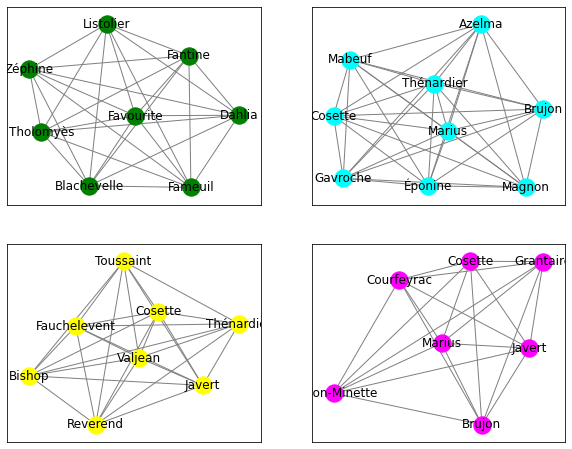

In [27]:
fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_subplot(221)
nx.draw_networkx(H2.subgraph(cl2[5]), font_size = 12, font_color = 'black', node_color = 'green', edge_color = 'gray')
ax1 = fig.add_subplot(222)
nx.draw_networkx(H2.subgraph(cl2[0]), font_size = 12, font_color = 'black', node_color = 'cyan', edge_color = 'gray')
ax1 = fig.add_subplot(223)
nx.draw_networkx(H2.subgraph(cl2[24]), font_size = 12, font_color = 'black', node_color = 'yellow', edge_color = 'gray')
ax1 = fig.add_subplot(224)
nx.draw_networkx(H2.subgraph(cl2[34]), font_size = 12, font_color = 'black', node_color = '#ff00ff', edge_color = 'gray')
